In [2]:
%pip install nltk
%pip install pymorphy3
%pip install numpy
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# импорт необходимых библиотек

import os
import re
import nltk
import string
import pymorphy3
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk import download
nltk.download('punkt.tab')
download('stopwords')
morph = pymorphy3.MorphAnalyzer()
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

[nltk_data] Error loading punkt.tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>


In [4]:
# загрузка всех 18 глав по порядку - каждая из них пронумерована
with open('1.txt', encoding='utf-8') as f:
    chapter_1 = f.read()

with open('2.txt', encoding='utf-8') as f:
    chapter_2 = f.read()

with open('3.txt', encoding='utf-8') as f:
    chapter_3 = f.read()

with open('4.txt', encoding='utf-8') as f:
    chapter_4 = f.read()

with open('5.txt', encoding='utf-8') as f:
    chapter_5 = f.read()

with open('6.txt', encoding='utf-8') as f:
    chapter_6 = f.read()

with open('7.txt', encoding='utf-8') as f:
    chapter_7 = f.read()

with open('8.txt', encoding='utf-8') as f:
    chapter_8 = f.read()

with open('9.txt', encoding='utf-8') as f:
    chapter_9 = f.read()

with open('10.txt', encoding='utf-8') as f:
    chapter_10 = f.read()

with open('11.txt', encoding='utf-8') as f:
    chapter_11 = f.read()

with open('12.txt', encoding='utf-8') as f:
    chapter_12 = f.read()

with open('13.txt', encoding='utf-8') as f:
    chapter_13 = f.read()

with open('14.txt', encoding='utf-8') as f:
    chapter_14 = f.read()

with open('15.txt', encoding='utf-8') as f:
    chapter_15 = f.read()

with open('16.txt', encoding='utf-8') as f:
    chapter_16 = f.read()

with open('17.txt', encoding='utf-8') as f:
    chapter_17 = f.read()

with open('18.txt', encoding='utf-8') as f:
    chapter_18 = f.read()

In [5]:
# предобработка глав

# глава 1
# приводим текст к нижнему регистру
chapter_1 = chapter_1.lower()
# удаляем сноски в квадратных скобках - в "Улиссе" много примечаний
chapter_1 = re.sub(r'\[[^\]]*\]', '', chapter_1)
# удаляем пунктуацию
chapter_1 = re.sub(r'[^\w\s]', '', chapter_1)
# разбиваем на токены
tokens_1 = re.findall(r'\w+', chapter_1)
# удаляем стоп-слова
filtered_tokens_1 = [token for token in tokens_1 if token not in stop_words]
# лемматизация
lemmas_1 = [morph.parse(token)[0].normal_form for token in filtered_tokens_1]
# количество получившихся лемм после предобработки, вывожу в отдельную переменную, она нам позже понадобится
len(lemmas_1)
# поиск слова "наследник" и его синонимов (включая различные формы)
search_terms_1 = {'наследник', 'преемник', 'потомок', 'продолжатель', 'последователь'}
search_pattern_1 = re.compile(r'^(наслед|преем|потом|продолжат|последоват)[а-я]*$', re.IGNORECASE)
found_words_1 = [lemma for lemma in lemmas_1 if search_pattern_1.match(lemma)]
print("Найденные слова в главе 1:", found_words_1)
# какое слово среди найденных употребляется чаще всего?
word_counts_1 = Counter(found_words_1)
most_common_word_1, most_common_count_1 = word_counts_1.most_common(1)[0] if word_counts_1 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_1} ({most_common_count_1} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_1 = (len(found_words_1) / len(lemmas_1)) * 100 if len(lemmas_1) > 0 else 0
print(f"Процент найденных слов: {percentage_found_1:.2f}%")

Найденные слова в главе 1: ['продолжать', 'продолжать', 'продолжать', 'продолжать', 'продолжать', 'продолжать', 'продолжать', 'последовать', 'продолжать', 'продолжать', 'продолжать']
Наиболее употребляемое слово: продолжать (10 раз)
Процент найденных слов: 0.27%


In [6]:
# глава 2
# приводим текст к нижнему регистру
chapter_2 = chapter_2.lower()
# удаляем сноски в квадратных скобках
chapter_2 = re.sub(r'\[[^\]]*\]', '', chapter_2)
# удаляем пунктуацию
chapter_2 = re.sub(r'[^\w\s]', '', chapter_2)
# разбиваем на токены
tokens_2 = re.findall(r'\w+', chapter_2)
# удаляем стоп-слова
filtered_tokens_2 = [token for token in tokens_2 if token not in stop_words]
# лемматизация
lemmas_2 = [morph.parse(token)[0].normal_form for token in filtered_tokens_2]
len(lemmas_2)
# поиск слова "лошадь" и его синонимов
search_terms_2 = {'лошадь', 'конюшн', 'жеребец', 'кобыла', 'пони', 'гнедой', 'вороной', 'мустанг', 'рысак'}
search_pattern_2 = re.compile(r'^(лошад|конюшн|жереб|кобыл|пони|гнед|ворон|мустанг|рыс)[а-я]*$', re.IGNORECASE)
found_words_2 = [lemma for lemma in lemmas_2 if search_pattern_2.match(lemma)]
print("Найденные слова в главе 2:", found_words_2)
# какое слово среди найденных употребляется чаще всего?
word_counts_2 = Counter(found_words_2)
most_common_word_2, most_common_count_2 = word_counts_2.most_common(1)[0] if word_counts_2 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_2} ({most_common_count_2} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_2 = (len(found_words_2) / len(lemmas_2)) * 100 if len(lemmas_2) > 0 else 0
print(f"Процент найденных слов: {percentage_found_2:.2f}%")

Найденные слова в главе 2: ['лошадь', 'лошадь', 'конюшня']
Наиболее употребляемое слово: лошадь (2 раз)
Процент найденных слов: 0.12%


In [7]:
# глава 3
# приводим текст к нижнему регистру
chapter_3 = chapter_3.lower()
# удаляем сноски в квадратных скобках
chapter_3 = re.sub(r'\[[^\]]*\]', '', chapter_3)
# удаляем пунктуацию
chapter_3 = re.sub(r'[^\w\s]', '', chapter_3)
# разбиваем на токены
tokens_3 = re.findall(r'\w+', chapter_3)
# удаляем стоп-слова
filtered_tokens_3 = [token for token in tokens_3 if token not in stop_words]
# лемматизация
lemmas_3 = [morph.parse(token)[0].normal_form for token in filtered_tokens_3]
len(lemmas_3)
# поиск слова "прилив" и его синонимов
search_terms_3 = {'прилив', 'подъем', 'приток', 'нарастание', 'наплыв', 'прибой', 'волна', 'подтопление', 'приход', 'всплеск'}
search_pattern_3 = re.compile(r'^(прилив|подъем|приток|нараста|наплыв|прибо|волн|подтоплен|приход|всплеск)[а-я]*$', re.IGNORECASE)
found_words_3 = [lemma for lemma in lemmas_3 if search_pattern_3.match(lemma)]
print("Найденные слова в главе 3:", found_words_3)
# какое слово среди найденных употребляется чаще всего?
word_counts_3 = Counter(found_words_3)
most_common_word_3, most_common_count_3 = word_counts_3.most_common(1)[0] if word_counts_3 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_3} ({most_common_count_3} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_3 = (len(found_words_3) / len(lemmas_3)) * 100 if len(lemmas_3) > 0 else 0
print(f"Процент найденных слов: {percentage_found_3:.2f}%")

Найденные слова в главе 3: ['прилив', 'волна', 'прилив', 'прилив', 'прибой', 'прилив', 'прилив', 'волна', 'волна', 'волна', 'прилив', 'прилив', 'волна', 'прилив', 'волна', 'прилив', 'волна', 'приходить']
Наиболее употребляемое слово: прилив (9 раз)
Процент найденных слов: 0.53%


In [8]:
# глава 4
# приводим текст к нижнему регистру
chapter_4 = chapter_4.lower()
# удаляем сноски в квадратных скобках
chapter_4 = re.sub(r'\[[^\]]*\]', '', chapter_4)
# удаляем пунктуацию
chapter_4 = re.sub(r'[^\w\s]', '', chapter_4)
# разбиваем на токены
tokens_4 = re.findall(r'\w+', chapter_4)
# удаляем стоп-слова
filtered_tokens_4 = [token for token in tokens_4 if token not in stop_words]
# лемматизация
lemmas_4 = [morph.parse(token)[0].normal_form for token in filtered_tokens_4]
len(lemmas_4)
# поиск слова "нимфа" и его синонимов
search_terms_4 = {'нимфа', 'сирена', 'божество', 'дева', 'нереида'}
search_pattern_4 = re.compile(r'^(нимф|сирен|божеств|дев|нереид)[а-я]*$', re.IGNORECASE)
found_words_4 = [lemma for lemma in lemmas_4 if search_pattern_4.match(lemma)]
print("Найденные слова в главе 4:", found_words_4)
# какое слово среди найденных употребляется чаще всего?
word_counts_4 = Counter(found_words_4)
most_common_word_4, most_common_count_4 = word_counts_4.most_common(1)[0] if word_counts_4 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_4} ({most_common_count_4} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_4 = (len(found_words_4) / len(lemmas_4)) * 100 if len(lemmas_4) > 0 else 0
print(f"Процент найденных слов: {percentage_found_4:.2f}%")

Найденные слова в главе 4: ['девушка', 'девушка', 'нимфа', 'нимфа', 'нимфа', 'девчонка', 'девичий', 'девушка']
Наиболее употребляемое слово: девушка (3 раз)
Процент найденных слов: 0.24%


In [9]:
# глава 5
# приводим текст к нижнему регистру
chapter_5 = chapter_5.lower()
# удаляем сноски в квадратных скобках
chapter_5 = re.sub(r'\[[^\]]*\]', '', chapter_5)
# удаляем пунктуацию
chapter_5 = re.sub(r'[^\w\s]', '', chapter_5)
# разбиваем на токены
tokens_5 = re.findall(r'\w+', chapter_5)
# удаляем стоп-слова
filtered_tokens_5 = [token for token in tokens_5 if token not in stop_words]
# лемматизация
lemmas_5 = [morph.parse(token)[0].normal_form for token in filtered_tokens_5]
len(lemmas_5)
# поиск слова "евхарист" и его синонимов
search_terms_5 = {'евхарист', 'благодать', 'таинство', 'литургия', 'приобщение', 'причастие', 'причащение', 'благодарение', 'месса'}
search_pattern_5 = re.compile(r'^(евхарист|благодат|таинств|литурги|приобщ|причаст|причащ|благодар|месс)[а-я]*$', re.IGNORECASE)
found_words_5 = [lemma for lemma in lemmas_5 if search_pattern_5.match(lemma)]
print("Найденные слова в главе 5:", found_words_5)
# какое слово среди найденных употребляется чаще всего?
word_counts_5 = Counter(found_words_5)
most_common_word_5, most_common_count_5 = word_counts_5.most_common(1)[0] if word_counts_5 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_5} ({most_common_count_5} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_5 = (len(found_words_5) / len(lemmas_5)) * 100 if len(lemmas_5) > 0 else 0
print(f"Процент найденных слов: {percentage_found_5:.2f}%")

Найденные слова в главе 5: ['благодарный', 'месса', 'таинственно', 'месса', 'причастие', 'причастник', 'причастие', 'месса', 'причастие', 'месса', 'месса', 'месса', 'благодарение']
Наиболее употребляемое слово: месса (6 раз)
Процент найденных слов: 0.36%


In [10]:
# глава 6
# приводим текст к нижнему регистру
chapter_6 = chapter_6.lower()
# удаляем сноски в квадратных скобках
chapter_6 = re.sub(r'\[[^\]]*\]', '', chapter_6)
# удаляем пунктуацию
chapter_6 = re.sub(r'[^\w\s]', '', chapter_6)
# разбиваем на токены
tokens_6 = re.findall(r'\w+', chapter_6)
# удаляем стоп-слова
filtered_tokens_6 = [token for token in tokens_6 if token not in stop_words]
# лемматизация
lemmas_6 = [morph.parse(token)[0].normal_form for token in filtered_tokens_6]
len(lemmas_6)
# поиск слова "смотритель" и его синонимов
search_terms_6 = {'смотритель', 'инспектор', 'наблюдатель', 'сторож', 'надзиратель', 'страж', 'блюститель', 'дозорный', 'охранник', 'караульный'}
search_pattern_6 = re.compile(r'^(смотрител|инспект|наблюдат|сторож|надзират|страж|блюстит|дозор|охран|караул)[а-я]*$', re.IGNORECASE)
found_words_6 = [lemma for lemma in lemmas_6 if search_pattern_6.match(lemma)]
print("Найденные слова в главе 6:", found_words_6)
# какое слово среди найденных употребляется чаще всего?
word_counts_6 = Counter(found_words_6)
most_common_word_6, most_common_count_6 = word_counts_6.most_common(1)[0] if word_counts_6 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_6} ({most_common_count_6} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_6 = (len(found_words_6) / len(lemmas_6)) * 100 if len(lemmas_6) > 0 else 0
print(f"Процент найденных слов: {percentage_found_6:.2f}%")

Найденные слова в главе 6: ['смотритель', 'смотритель', 'смотритель', 'смотритель', 'смотритель', 'смотритель', 'смотритель', 'смотритель']
Наиболее употребляемое слово: смотритель (8 раз)
Процент найденных слов: 0.13%


In [11]:
# глава 7
# приводим текст к нижнему регистру
chapter_7 = chapter_7.lower()
# удаляем сноски в квадратных скобках
chapter_7 = re.sub(r'\[[^\]]*\]', '', chapter_7)
# удаляем пунктуацию
chapter_7 = re.sub(r'[^\w\s]', '', chapter_7)
# разбиваем на токены
tokens_7 = re.findall(r'\w+', chapter_7)
# удаляем стоп-слова
filtered_tokens_7 = [token for token in tokens_7 if token not in stop_words]
# лемматизация
lemmas_7 = [morph.parse(token)[0].normal_form for token in filtered_tokens_7]
len(lemmas_7)
# поиск слова "редактор" и его синонимов
search_terms_7 = {'редактор', 'издатель', 'корректор', 'справка', 'вычитка', 'текст', 'редакция', 'заметка'}
search_pattern_7 = re.compile(r'^(редак|издат|коррект|справк|справоч|чит|текст|замет)[а-я]*$', re.IGNORECASE)
found_words_7 = [lemma for lemma in lemmas_7 if search_pattern_7.match(lemma)]
print("Найденные слова в главе 7:", found_words_7)
# какое слово среди найденных употребляется чаще всего?
word_counts_7 = Counter(found_words_7)
most_common_word_7, most_common_count_7 = word_counts_7.most_common(1)[0] if word_counts_7 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_7} ({most_common_count_7} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_7 = (len(found_words_7) / len(lemmas_7)) * 100 if len(lemmas_7) > 0 else 0
print(f"Процент найденных слов: {percentage_found_7:.2f}%")

Найденные слова в главе 7: ['редакция', 'заметка', 'заметка', 'редактор', 'редакция', 'заметка', 'текст', 'читать', 'читать', 'редакция', 'читать', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'заметить', 'редактор', 'редактор', 'редакция', 'редактор', 'читать', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'редакция', 'редактор', 'редактор', 'редактор', 'редактор', 'редактор', 'заметить', 'заметить', 'редактор', 'редакция', 'редактор', 'заметка', 'редактор', 'заметка']
Наиболее употребляемое слово: редактор (26 раз)
Процент найденных слов: 0.75%


In [12]:
# глава 8
# приводим текст к нижнему регистру
chapter_8 = chapter_8.lower()
# удаляем сноски в квадратных скобках
chapter_8 = re.sub(r'\[[^\]]*\]', '', chapter_8)
# удаляем пунктуацию
chapter_8 = re.sub(r'[^\w\s]', '', chapter_8)
# разбиваем на токены
tokens_8 = re.findall(r'\w+', chapter_8)
# удаляем стоп-слова
filtered_tokens_8 = [token for token in tokens_8 if token not in stop_words]
# лемматизация
lemmas_8 = [morph.parse(token)[0].normal_form for token in filtered_tokens_8]
len(lemmas_8)
# поиск слова "констебль" и его синонимов
search_terms_8 = {'констебль', 'капитан', 'полицейский', 'чин', 'жандарм', 'страж', 'патрульный', 'шериф', 'блюститель'}
search_pattern_8 = re.compile(r'^(констебл|полиц|чин|жандарм|страж|патрул|шериф|блюстит)[а-я]*$', re.IGNORECASE)
found_words_8 = [lemma for lemma in lemmas_8 if search_pattern_8.match(lemma)]
print("Найденные слова в главе 8:", found_words_8)
# какое слово среди найденных употребляется чаще всего?
word_counts_8 = Counter(found_words_8)
most_common_word_8, most_common_count_8 = word_counts_8.most_common(1)[0] if word_counts_8 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_8} ({most_common_count_8} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_8 = (len(found_words_8) / len(lemmas_8)) * 100 if len(lemmas_8) > 0 else 0
print(f"Процент найденных слов: {percentage_found_8:.2f}%")

Найденные слова в главе 8: ['полиция', 'полицейский', 'полицейский', 'полицейский', 'чиновник', 'полиция', 'полицейский', 'полиция', 'полицейский']
Наиболее употребляемое слово: полицейский (5 раз)
Процент найденных слов: 0.12%


In [13]:
# глава 9
# приводим текст к нижнему регистру
chapter_9 = chapter_9.lower()
# удаляем сноски в квадратных скобках
chapter_9 = re.sub(r'\[[^\]]*\]', '', chapter_9)
# удаляем пунктуацию
chapter_9 = re.sub(r'[^\w\s]', '', chapter_9)
# разбиваем на токены
tokens_9 = re.findall(r'\w+', chapter_9)
# удаляем стоп-слова
filtered_tokens_9 = [token for token in tokens_9 if token not in stop_words]
# лемматизация
lemmas_9 = [morph.parse(token)[0].normal_form for token in filtered_tokens_9]
len(lemmas_9)
# поиск слова "стратфорд" и его синонимов
# упс! стратфорд - это название населенного пункта, поэтому синонимов к нему не подобрать - только производные
search_terms_9 = {'стратфорд', 'район', 'город'}
search_pattern_9 = re.compile(r'^(стратфорд|район|город)[а-я]*$', re.IGNORECASE)
found_words_9 = [lemma for lemma in lemmas_9 if search_pattern_9.match(lemma)]
print("Найденные слова в главе 9:", found_words_9)
# какое слово среди найденных употребляется чаще всего?
word_counts_9 = Counter(found_words_9)
most_common_word_9, most_common_count_9 = word_counts_9.most_common(1)[0] if word_counts_9 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_9} ({most_common_count_9} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_9 = (len(found_words_9) / len(lemmas_9)) * 100 if len(lemmas_9) > 0 else 0
print(f"Процент найденных слов: {percentage_found_9:.2f}%")

Найденные слова в главе 9: ['городок', 'стратфорд', 'стратфорд', 'стратфорд', 'город', 'город', 'стратфорд', 'стратфорд', 'стратфорд', 'город', 'стратфордский']
Наиболее употребляемое слово: стратфорд (6 раз)
Процент найденных слов: 0.15%


In [14]:
# глава 10
# приводим текст к нижнему регистру
chapter_10 = chapter_10.lower()
# удаляем сноски в квадратных скобках
chapter_10 = re.sub(r'\[[^\]]*\]', '', chapter_10)
# удаляем пунктуацию
chapter_10 = re.sub(r'[^\w\s]', '', chapter_10)
# разбиваем на токены
tokens_10 = re.findall(r'\w+', chapter_10)
# удаляем стоп-слова
filtered_tokens_10 = [token for token in tokens_10 if token not in stop_words]
# лемматизация
lemmas_10 = [morph.parse(token)[0].normal_form for token in filtered_tokens_10]
len(lemmas_10)
# поиск слова "граждане" и его синонимов
search_terms_10 = {'граждане', 'жители', 'люди', 'население', 'горожане', 'народ', 'общество', 'общественность'}
search_pattern_10 = re.compile(r'^(граждан|жит|люд|насел|горож|народ|обществ)[а-я]*$', re.IGNORECASE)
found_words_10 = [lemma for lemma in lemmas_10 if search_pattern_10.match(lemma)]
print("Найденные слова в главе 10:", found_words_10)
# какое слово среди найденных употребляется чаще всего?
word_counts_10 = Counter(found_words_10)
most_common_word_10, most_common_count_10 = word_counts_10.most_common(1)[0] if word_counts_10 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_10} ({most_common_count_10} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_10 = (len(found_words_10) / len(lemmas_10)) * 100 if len(lemmas_10) > 0 else 0
print(f"Процент найденных слов: {percentage_found_10:.2f}%")

Найденные слова в главе 10: ['людская', 'гражданский', 'гражданский', 'гражданин']
Наиболее употребляемое слово: гражданский (2 раз)
Процент найденных слов: 0.05%


In [15]:
# глава 11
# приводим текст к нижнему регистру
chapter_11 = chapter_11.lower()
# удаляем сноски в квадратных скобках
chapter_11 = re.sub(r'\[[^\]]*\]', '', chapter_11)
# удаляем пунктуацию
chapter_11 = re.sub(r'[^\w\s]', '', chapter_11)
# разбиваем на токены
tokens_11 = re.findall(r'\w+', chapter_11)
# удаляем стоп-слова
filtered_tokens_11 = [token for token in tokens_11 if token not in stop_words]
# лемматизация
lemmas_11 = [morph.parse(token)[0].normal_form for token in filtered_tokens_11]
len(lemmas_11)
# поиск слова "бармен" и его синонимов
search_terms_11 = {'бармен', 'трактирщик'}
search_pattern_11 = re.compile(r'^(барм|барн|трактир)[а-я]*$', re.IGNORECASE)
found_words_11 = [lemma for lemma in lemmas_11 if search_pattern_11.match(lemma)]
print("Найденные слова в главе 11:", found_words_11)
# какое слово среди найденных употребляется чаще всего?
word_counts_11 = Counter(found_words_11)
most_common_word_11, most_common_count_11 = word_counts_11.most_common(1)[0] if word_counts_11 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_11} ({most_common_count_11} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_11 = (len(found_words_11) / len(lemmas_11)) * 100 if len(lemmas_11) > 0 else 0
print(f"Процент найденных слов: {percentage_found_11:.2f}%")

Найденные слова в главе 11: ['барменша', 'барнлейн', 'барни']
Наиболее употребляемое слово: барменша (1 раз)
Процент найденных слов: 0.04%


In [16]:
# глава 12
# приводим текст к нижнему регистру
chapter_12 = chapter_12.lower()
# удаляем сноски в квадратных скобках
chapter_12 = re.sub(r'\[[^\]]*\]', '', chapter_12)
# удаляем пунктуацию
chapter_12 = re.sub(r'[^\w\s]', '', chapter_12)
# разбиваем на токены
tokens_12 = re.findall(r'\w+', chapter_12)
# удаляем стоп-слова
filtered_tokens_12 = [token for token in tokens_12 if token not in stop_words]
# лемматизация
lemmas_12 = [morph.parse(token)[0].normal_form for token in filtered_tokens_12]
len(lemmas_12)
# поиск слова "фений" и его синонимов
search_terms_12 = {'фений', 'революционер', 'ирландец', 'республиканец'}
search_pattern_12 = re.compile(r'^(фений|револю|ирланд|республик)[а-я]*$', re.IGNORECASE)
found_words_12 = [lemma for lemma in lemmas_12 if search_pattern_12.match(lemma)]
print("Найденные слова в главе 12:", found_words_12)
# какое слово среди найденных употребляется чаще всего?
word_counts_12 = Counter(found_words_12)
most_common_word_12, most_common_count_12 = word_counts_12.most_common(1)[0] if word_counts_12 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_12} ({most_common_count_12} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_12 = (len(found_words_12) / len(lemmas_12)) * 100 if len(lemmas_12) > 0 else 0
print(f"Процент найденных слов: {percentage_found_12:.2f}%")

Найденные слова в главе 12: ['ирландия', 'ирландский', 'ирландский', 'ирландец', 'ирландия', 'ирландия', 'ирландия', 'ирландский', 'ирландия', 'революция', 'ирландский', 'ирландский', 'ирландия', 'ирландия', 'ирландия', 'ирландский', 'ирландский', 'ирландский', 'ирландский', 'ирландия', 'ирландский', 'ирландский', 'ирландия', 'ирландский', 'ирландский', 'ирландия', 'ирландский', 'ирландский', 'ирландец', 'ирландский', 'ирландия', 'ирландец', 'ирландский', 'ирландский', 'ирландия', 'ирландия', 'ирландец', 'ирландия', 'ирландский', 'ирландский', 'ирландия', 'ирландский', 'ирландия', 'ирландский', 'ирландец', 'ирландия', 'ирландия', 'ирландский', 'ирландия', 'ирландия', 'ирландский', 'ирландский']
Наиболее употребляемое слово: ирландский (25 раз)
Процент найденных слов: 0.43%


In [17]:
# глава 13
# приводим текст к нижнему регистру
chapter_13 = chapter_13.lower()
# удаляем сноски в квадратных скобках
chapter_13 = re.sub(r'\[[^\]]*\]', '', chapter_13)
# удаляем пунктуацию
chapter_13 = re.sub(r'[^\w\s]', '', chapter_13)
# разбиваем на токены
tokens_13 = re.findall(r'\w+', chapter_13)
# удаляем стоп-слова
filtered_tokens_13 = [token for token in tokens_13 if token not in stop_words]
# лемматизация
lemmas_13 = [morph.parse(token)[0].normal_form for token in filtered_tokens_13]
len(lemmas_13)
# поиск слова "девственность" и его синонимов
search_terms_13 = {'девственность', 'целомудрие', 'чистота', 'невинность', 'первозданность', 'непорочность', 'честь', 'незапятнанность'}
search_pattern_13 = re.compile(r'^(девственн|целомудр|чистот|невинн|первоздан|непорочн|чест|незапятнан)[а-я]*$', re.IGNORECASE)
found_words_13 = [lemma for lemma in lemmas_13 if search_pattern_13.match(lemma)]
print("Найденные слова в главе 13:", found_words_13)
# какое слово среди найденных употребляется чаще всего?
word_counts_13 = Counter(found_words_13)
most_common_word_13, most_common_count_13 = word_counts_13.most_common(1)[0] if word_counts_13 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_13} ({most_common_count_13} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_13 = (len(found_words_13) / len(lemmas_13)) * 100 if len(lemmas_13) > 0 else 0
print(f"Процент найденных слов: {percentage_found_13:.2f}%")

Найденные слова в главе 13: ['чистота', 'честь', 'непорочный', 'невинный', 'чистота', 'честь', 'честь', 'честь', 'невинный', 'невинность']
Наиболее употребляемое слово: честь (4 раз)
Процент найденных слов: 0.11%


In [18]:
# глава 14
# приводим текст к нижнему регистру
chapter_14 = chapter_14.lower()
# удаляем сноски в квадратных скобках
chapter_14 = re.sub(r'\[[^\]]*\]', '', chapter_14)
# удаляем пунктуацию
chapter_14 = re.sub(r'[^\w\s]', '', chapter_14)
# разбиваем на токены
tokens_14 = re.findall(r'\w+', chapter_14)
# удаляем стоп-слова
filtered_tokens_14 = [token for token in tokens_14 if token not in stop_words]
# лемматизация
lemmas_14 = [morph.parse(token)[0].normal_form for token in filtered_tokens_14]
len(lemmas_14)
# поиск слова "мать" и его синонимов
search_terms_14 = {'мать', 'мама', 'матушка', 'родитель'}
search_pattern_14 = re.compile(r'^(мать|мамоч|маму|мама|мате|родит)[а-я]*$', re.IGNORECASE)
found_words_14 = [lemma for lemma in lemmas_14 if search_pattern_14.match(lemma)]
print("Найденные слова в главе 14:", found_words_14)
# какое слово среди найденных употребляется чаще всего?
word_counts_14 = Counter(found_words_14)
most_common_word_14, most_common_count_14 = word_counts_14.most_common(1)[0] if word_counts_14 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_14} ({most_common_count_14} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_14 = (len(found_words_14) / len(lemmas_14)) * 100 if len(lemmas_14) > 0 else 0
print(f"Процент найденных слов: {percentage_found_14:.2f}%")

Найденные слова в главе 14: ['материнство', 'мать', 'мать', 'матер', 'родиться', 'матер', 'родить', 'родить', 'родить', 'родить', 'матер', 'мать', 'мать', 'мать', 'мать', 'матер', 'матер', 'родиться', 'материнство', 'материнство', 'мать', 'родить', 'материя', 'материя', 'родить', 'мать', 'мать', 'родить', 'мать', 'мать', 'мать', 'мать', 'родитель', 'материнский', 'мать', 'материнский', 'материнство', 'мать', 'мать', 'мать', 'мамочка', 'мать']
Наиболее употребляемое слово: мать (18 раз)
Процент найденных слов: 0.34%


In [19]:
# глава 15
# приводим текст к нижнему регистру
chapter_15 = chapter_15.lower()
# удаляем сноски в квадратных скобках
chapter_15 = re.sub(r'\[[^\]]*\]', '', chapter_15)
# удаляем пунктуацию
chapter_15 = re.sub(r'[^\w\s]', '', chapter_15)
# разбиваем на токены
tokens_15 = re.findall(r'\w+', chapter_15)
# удаляем стоп-слова
filtered_tokens_15 = [token for token in tokens_15 if token not in stop_words]
# лемматизация
lemmas_15 = [morph.parse(token)[0].normal_form for token in filtered_tokens_15]
len(lemmas_15)
# поиск слова "проституция" и его синонимов
search_terms_15 = {'проституция', 'блуд', 'распутство'}
search_pattern_15 = re.compile(r'^(проститу|блуд|распут)[а-я]*$', re.IGNORECASE)
found_words_15 = [lemma for lemma in lemmas_15 if search_pattern_15.match(lemma)]
print("Найденные слова в главе 15:", found_words_15)
# какое слово среди найденных употребляется чаще всего?
word_counts_15 = Counter(found_words_15)
most_common_word_15, most_common_count_15 = word_counts_15.most_common(1)[0] if word_counts_15 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_15} ({most_common_count_15} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_15 = (len(found_words_15) / len(lemmas_15)) * 100 if len(lemmas_15) > 0 else 0
print(f"Процент найденных слов: {percentage_found_15:.2f}%")

Найденные слова в главе 15: ['блудный', 'распутница', 'блудный', 'распутство', 'блудница', 'распутник', 'проститутка', 'проститутка', 'распутный', 'проститутка', 'проститутка', 'проститутка', 'проститутка', 'проститутка', 'проститутка']
Наиболее употребляемое слово: проститутка (8 раз)
Процент найденных слов: 0.06%


In [20]:
# глава 16
# приводим текст к нижнему регистру
chapter_16 = chapter_16.lower()
# удаляем сноски в квадратных скобках
chapter_16 = re.sub(r'\[[^\]]*\]', '', chapter_16)
# удаляем пунктуацию
chapter_16 = re.sub(r'[^\w\s]', '', chapter_16)
# разбиваем на токены
tokens_16 = re.findall(r'\w+', chapter_16)
# удаляем стоп-слова
filtered_tokens_16 = [token for token in tokens_16 if token not in stop_words]
# лемматизация
lemmas_16 = [morph.parse(token)[0].normal_form for token in filtered_tokens_16]
len(lemmas_16)
# поиск слова "моряки" и его синонимов
search_terms_16 = {'моряки', 'матрос', 'флот', 'мореплаватель', 'салага', 'юнга', 'мореход'}
search_pattern_16 = re.compile(r'^(моряк|матрос|флот|мореплават|салаг|юнг|мореход)[а-я]*$', re.IGNORECASE)
found_words_16 = [lemma for lemma in lemmas_16 if search_pattern_16.match(lemma)]
print("Найденные слова в главе 16:", found_words_16)
# какое слово среди найденных употребляется чаще всего?
word_counts_16 = Counter(found_words_16)
most_common_word_16, most_common_count_16 = word_counts_16.most_common(1)[0] if word_counts_16 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_16} ({most_common_count_16} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_16 = (len(found_words_16) / len(lemmas_16)) * 100 if len(lemmas_16) > 0 else 0
print(f"Процент найденных слов: {percentage_found_16:.2f}%")

Найденные слова в главе 16: ['моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'матрос', 'моряк', 'моряк', 'мореход', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'матрос', 'моряк', 'моряк', 'моряк', 'моряк', 'моряк', 'мореход', 'моряк', 'матросский', 'моряк', 'моряк', 'матросский', 'матрос', 'матрос', 'мореход', 'моряк', 'мореплаватель']
Наиболее употребляемое слово: моряк (28 раз)
Процент найденных слов: 0.31%


In [21]:
# глава 17
# приводим текст к нижнему регистру
chapter_17 = chapter_17.lower()
# удаляем сноски в квадратных скобках
chapter_17 = re.sub(r'\[[^\]]*\]', '', chapter_17)
# удаляем пунктуацию
chapter_17 = re.sub(r'[^\w\s]', '', chapter_17)
# разбиваем на токены
tokens_17 = re.findall(r'\w+', chapter_17)
# удаляем стоп-слова
filtered_tokens_17 = [token for token in tokens_17 if token not in stop_words]
# лемматизация
lemmas_17 = [morph.parse(token)[0].normal_form for token in filtered_tokens_17]
len(lemmas_17)
# поиск слова "кометы" и его синонимов
search_terms_17 = {'кометы', 'тело', 'галактика', 'звезда', 'светило'}
search_pattern_17 = re.compile(r'^(комет|тело|тела|галакти|звезд|свети|светл)[а-я]*$', re.IGNORECASE)
found_words_17 = [lemma for lemma in lemmas_17 if search_pattern_17.match(lemma)]
print("Найденные слова в главе 17:", found_words_17)
# какое слово среди найденных употребляется чаще всего?
word_counts_17 = Counter(found_words_17)
most_common_word_17, most_common_count_17 = word_counts_17.most_common(1)[0] if word_counts_17 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_17} ({most_common_count_17} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_17 = (len(found_words_17) / len(lemmas_17)) * 100 if len(lemmas_17) > 0 else 0
print(f"Процент найденных слов: {percentage_found_17:.2f}%")

Найденные слова в главе 17: ['тело', 'тело', 'тело', 'тело', 'звезда', 'звезда', 'звезда', 'тело', 'тело', 'звезда', 'комета', 'тело', 'звезда', 'звезда', 'звезда', 'светило', 'тело', 'звезда', 'звезда', 'звезда', 'светило', 'светильник', 'светлый', 'светильникомбра', 'тело', 'светило', 'звезда', 'телосложение', 'кометный', 'звезда', 'тело', 'тело', 'телосложение', 'телосложение', 'звезда']
Наиболее употребляемое слово: звезда (13 раз)
Процент найденных слов: 0.24%


In [22]:
# глава 18
# приводим текст к нижнему регистру
chapter_18 = chapter_18.lower()
# удаляем сноски в квадратных скобках
chapter_18 = re.sub(r'\[[^\]]*\]', '', chapter_18)
# удаляем пунктуацию
chapter_18 = re.sub(r'[^\w\s]', '', chapter_18)
# разбиваем на токены
tokens_18 = re.findall(r'\w+', chapter_18)
# удаляем стоп-слова
filtered_tokens_18 = [token for token in tokens_18 if token not in stop_words]
# лемматизация
lemmas_18 = [morph.parse(token)[0].normal_form for token in filtered_tokens_18]
len(lemmas_18)
# поиск слова "земля" и его синонимов
search_terms_18 = {'земля', 'мир', 'планета', 'природа', 'суша', 'материк', 'плодородие', 'почва'}
search_pattern_18 = re.compile(r'^(земл|мир|планет|природ|суш|матер|плодород|почв)[а-я]*$', re.IGNORECASE)
found_words_18 = [lemma for lemma in lemmas_18 if search_pattern_18.match(lemma)]
print("Найденные слова в главе 18:", found_words_18)
# какое слово среди найденных употребляется чаще всего?
word_counts_18 = Counter(found_words_18)
most_common_word_18, most_common_count_18 = word_counts_18.most_common(1)[0] if word_counts_18 else (None, 0)
print(f"Наиболее употребляемое слово: {most_common_word_18} ({most_common_count_18} раз)")
# Вычисление процента найденных слов относительно общего количества лемм
percentage_found_18 = (len(found_words_18) / len(lemmas_18)) * 100 if len(lemmas_18) > 0 else 0
print(f"Процент найденных слов: {percentage_found_18:.2f}%")

Найденные слова в главе 18: ['землетрясение', 'мир', 'мир', 'материал', 'земля', 'мир', 'мир', 'природа', 'мир', 'природа', 'природа', 'мир', 'природа', 'природа']
Наиболее употребляемое слово: мир (6 раз)
Процент найденных слов: 0.13%


In [24]:
# Посчитаем общее количество лемм на весь роман
lemmas = lemmas_1 + lemmas_2 + lemmas_3 + lemmas_4 + lemmas_5 + lemmas_6 + lemmas_7 + lemmas_8 + lemmas_9 + lemmas_10 + lemmas_11 + lemmas_12 + lemmas_13 + lemmas_14 + lemmas_15 + lemmas_16 + lemmas_17 + lemmas_18
print(len(lemmas))
# Посчитаем все найденные слова относительно "символов" каждого эпизода
found_words = found_words_1 + found_words_2 + found_words_3 + found_words_4 + found_words_5 + found_words_6 + found_words_7 + found_words_8 + found_words_9 + found_words_10 + found_words_11 + found_words_12 + found_words_13 + found_words_14 + found_words_15 + found_words_16 + found_words_17 + found_words_18
print(len(found_words))

157147
339


In [25]:
# визуализируем результаты

# сначала таблицей

data_chapters = {
    'Эпизод 1':['0.27%', 'продолжать', '10'],
    'Эпизод 2':['0.12%', 'лошадь', '2'],
    'Эпизод 3':['0.53%', 'прилив', '9'],
    'Эпизод 4':['0.24%', 'девушка', '3'],
    'Эпизод 5':['0.36%', 'месса', '6'],
    'Эпизод 6':['0.13%', 'смотритель', '8'],
    'Эпизод 7':['0.27%', 'редактор', '26'],
    'Эпизод 8':['0.12%', 'полицейский', '5'],
    'Эпизод 9':['0.15%', 'стратфорд', '6'],
    'Эпизод 10':['0.05%', 'гражданский', '2'],
    'Эпизод 11':['0.04%', 'барменша', '1'],
    'Эпизод 12':['0.43%', 'ирландский', '25'],
    'Эпизод 13':['0.11%', 'честь', '4'],
    'Эпизод 14':['0.34%', 'мать', '18'],
    'Эпизод 15':['0.06%', 'проститутка', '8'],
    'Эпизод 16':['0.31%', 'моряк', '28'],
    'Эпизод 17':['0.24%', 'звезда', '13'],
    'Эпизод 18':['0.13%', 'мир', '6'],
}

chapters = pd.DataFrame.from_dict(data_chapters).T.rename(columns={0:"Процент найденных слов", 1:"Самое частое слово", 2:"Сколько раз"})
print(chapters)

          Процент найденных слов Самое частое слово Сколько раз
Эпизод 1                   0.27%         продолжать          10
Эпизод 2                   0.12%             лошадь           2
Эпизод 3                   0.53%             прилив           9
Эпизод 4                   0.24%            девушка           3
Эпизод 5                   0.36%              месса           6
Эпизод 6                   0.13%         смотритель           8
Эпизод 7                   0.27%           редактор          26
Эпизод 8                   0.12%        полицейский           5
Эпизод 9                   0.15%          стратфорд           6
Эпизод 10                  0.05%        гражданский           2
Эпизод 11                  0.04%           барменша           1
Эпизод 12                  0.43%         ирландский          25
Эпизод 13                  0.11%              честь           4
Эпизод 14                  0.34%               мать          18
Эпизод 15                  0.06%        

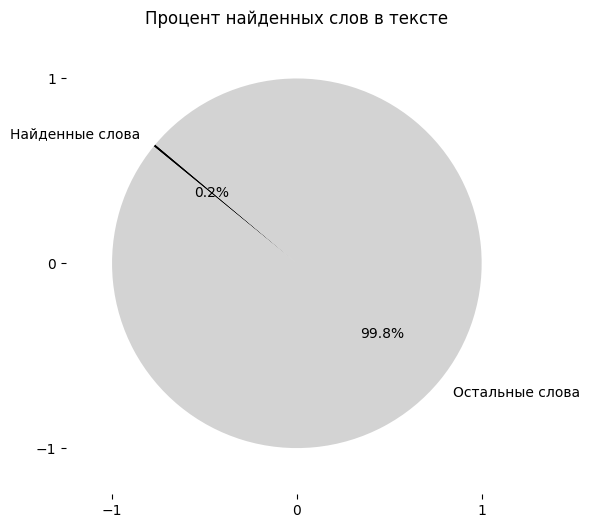

In [26]:
# а теперь в виде круговой диаграммы

fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Найденные слова', 'Остальные слова']
values = [len(found_words), len(lemmas) - len(found_words)]
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=['black', 'lightgray'], startangle=140)
ax.set_title('Процент найденных слов в тексте')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

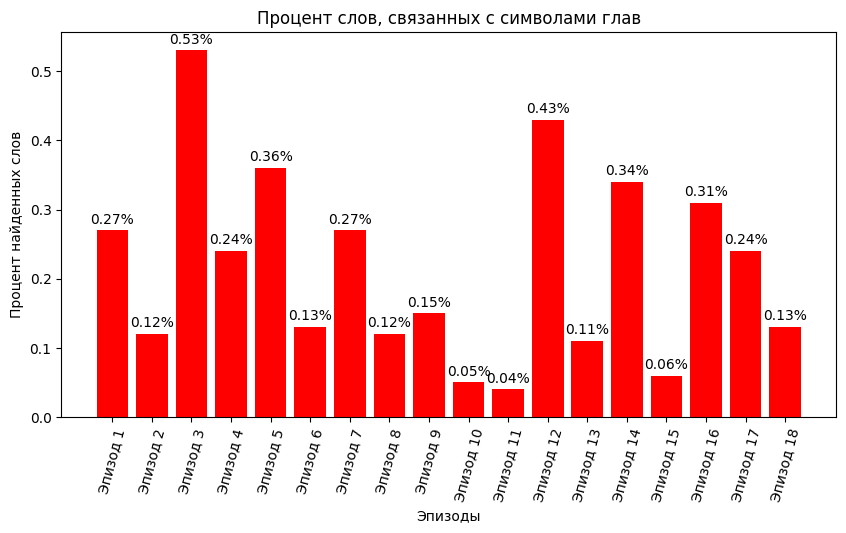

In [27]:
# и в виде графика

chapters = pd.DataFrame.from_dict(data_chapters, orient='index', columns=["Процент найденных слов", "Самое частое слово", "Сколько раз"])
# Преобразование процентных значений в числа
chapters["Процент найденных слов"] = chapters["Процент найденных слов"].str.rstrip('%').astype(float)
plt.figure(figsize=(10, 5))
plt.bar(chapters.index, chapters["Процент найденных слов"], color='red')
plt.xticks(rotation=75)
plt.xlabel("Эпизоды")
plt.ylabel("Процент найденных слов")
plt.title("Процент слов, связанных с символами глав")
for i, v in enumerate(chapters["Процент найденных слов"]):
    plt.text(i, v + 0.01, f"{v}%", ha='center', fontsize=10)
plt.show()